# Perbandingan Akurasi Pada Tiap Model dan data

In [26]:
%%capture
%run "./nb_adasyn.ipynb"

akurasi_nb_adasyn = akurasi
akurasi_random_forest_adasyn = akurasi_random_forest
akurasi_bagging_nb_adasyn = akurasi_bagging_nb
akurasi_bagging_dt_adasyn = akurasi_bagging_dt

In [27]:
%%capture
%run "./nb_smote.ipynb"

akurasi_nb_smote = akurasi
akurasi_random_forest_smote = akurasi_random_forest
akurasi_bagging_nb_smote = akurasi_bagging_nb
akurasi_bagging_dt_smote = akurasi_bagging_dt

In [28]:
%%capture
%run "./nb_imbalance.ipynb"

akurasi_nb_imbalance = akurasi
akurasi_random_forest_imbalance = akurasi_random_forest
akurasi_bagging_nb_imbalance = akurasi_bagging_nb
akurasi_bagging_dt_imbalance = akurasi_bagging_dt

In [ ]:
import pandas as pd

table_perbandingan = pd.DataFrame(
    data=[
        ["Imbalance", akurasi_nb_imbalance, akurasi_random_forest_imbalance, akurasi_bagging_nb_imbalance, akurasi_bagging_dt_imbalance],
        ["SMOTE", akurasi_nb_smote, akurasi_random_forest_smote, akurasi_bagging_nb_smote, akurasi_bagging_dt_smote],
        ["ADASYN", akurasi_nb_adasyn, akurasi_random_forest_adasyn, akurasi_bagging_nb_adasyn, akurasi_bagging_dt_adasyn],
    ],
    columns=["Data", "Naive Bayes Akurasi", "Random Forest Akurasi", "Bagging Naive Bayes Akurasi", "Bagging Deccision Tree Akurasi"],
)

table_perbandingan.style.hide(axis="index").format({
    "Naive Bayes Akurasi": "{:.3f}", 
    "Random Forest Akurasi": "{:.3f}", 
    "Bagging Naive Bayes Akurasi": "{:.3f}", 
    "Bagging Deccision Tree Akurasi": "{:.3f}"
})

Data/Model,Naive Bayes Akurasi,Random Forest Akurasi,Bagging Naive Bayes Akurasi,Bagging Deccision Tree Akurasi
Imbalance,0.792,0.822,0.822,0.822
SMOTE,0.825,0.969,0.830,0.965
ADASYN,0.835,0.965,0.840,0.948


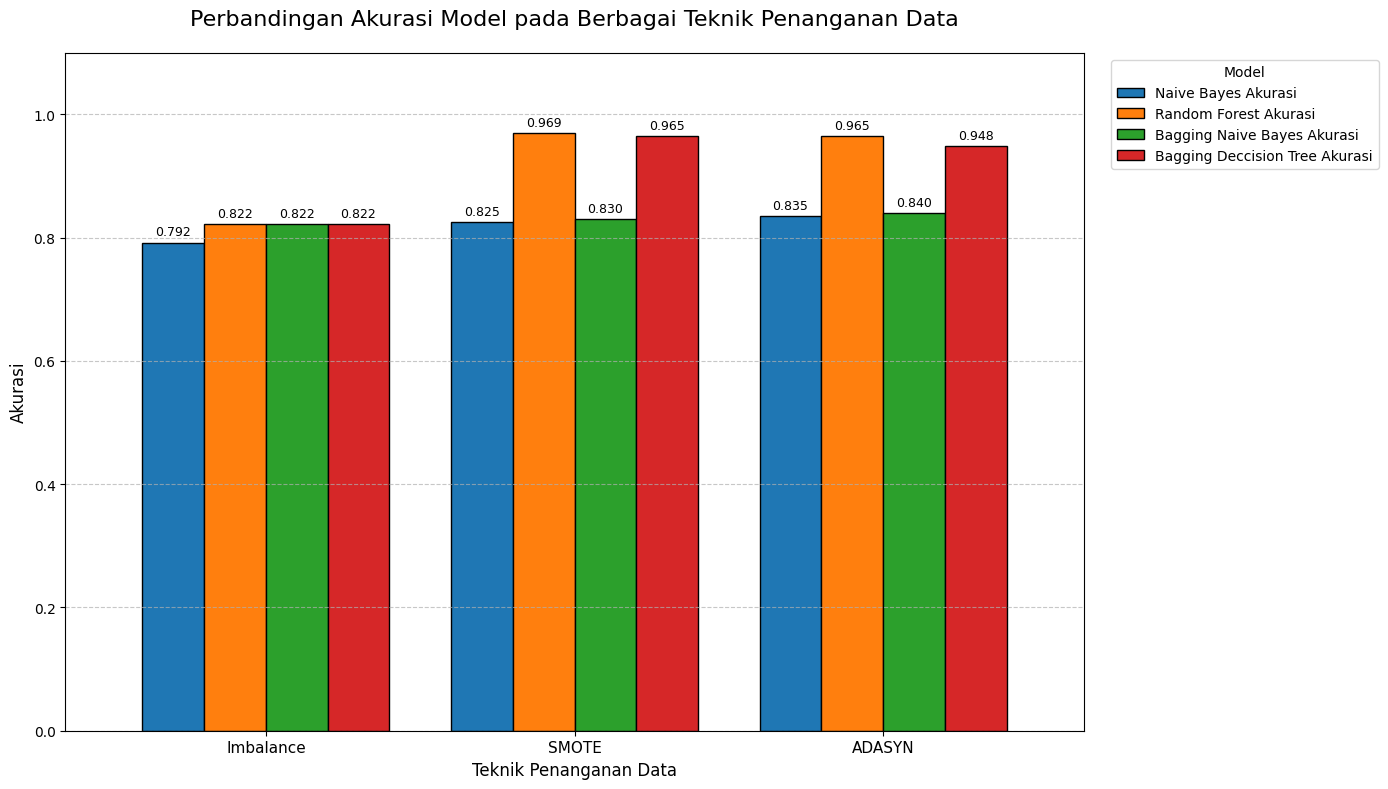

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

table_plot = table_perbandingan.set_index('Data')

ax = table_plot.plot(
    kind='bar',
    figsize=(14, 8),
    width=0.8, # Lebar grup batang
    edgecolor='black'
)

plt.title('Perbandingan Akurasi Model pada Berbagai Teknik Penanganan Data', size=16, pad=20)
plt.xlabel('Teknik Penanganan Data', size=12)
plt.ylabel('Akurasi', size=12)
plt.xticks(rotation=0, size=11) 
plt.yticks(size=10)
plt.ylim(0, 1.1) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', size=9, padding=3)

plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Kesimpulan Hasil Eksperimen

Berdasarkan tabel hasil akurasi model dengan berbagai kondisi data, diperoleh beberapa poin penting:

1. **Data Imbalance**  
   - Naive Bayes menghasilkan akurasi terendah (**0.792**) dibanding model lain.  
   - Random Forest, Bagging Naive Bayes, dan Bagging Decision Tree berada di kisaran **0.822**.

2. **SMOTE (Synthetic Minority Over-sampling Technique)**  
   - Semua model mengalami peningkatan akurasi.  
   - Random Forest menunjukkan peningkatan signifikan dengan akurasi tertinggi (**0.969**).  
   - Bagging Decision Tree juga memiliki akurasi tinggi (**0.965**).  
   - Naive Bayes meningkat menjadi **0.825**, sementara Bagging Naive Bayes menjadi **0.830**.

3. **ADASYN (Adaptive Synthetic Sampling)**  
   - Secara umum, hasil hampir sebanding dengan SMOTE, meskipun sedikit lebih rendah pada Random Forest dan Bagging Decision Tree.  
   - Naive Bayes (**0.835**) dan Bagging Naive Bayes (**0.840**) menunjukkan hasil sedikit lebih baik dibanding SMOTE.  
   - Random Forest tetap unggul dengan **0.965**, meski sedikit turun dari SMOTE.  
   - Bagging Decision Tree berada di **0.948**.

### Ringkasan
- **Random Forest** secara konsisten| menjadi model terbaik dengan akurasi tertinggi, terutama pada data dengan SMOTE.  
- **Naive Bayes** memiliki performa terendah dibanding model lain, namun tetap meningkat dengan SMOTE dan ADASYN.  
- **Bagging** memberikan peningkatan stabil, khususnya pada Naive Bayes.  
- Teknik **SMOTE dan ADASYN** terbukti efektif dalam meningkatkan akurasi model pada data tidak seimbang.
